<a href="https://colab.research.google.com/github/Creatrohit9/2-CAPSTON-ROHIT-BHADAURIYA-NYC-TAXI-TRIP-TIME-PRIDICTION/blob/main/ROHITBHADAURIYA_NYC_TAXI_TRIP_TIME_PRIDICTION_2_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

# **This is an Individual project colab notebook**

### **1-ROHIT BHADAURIYA**

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

# **IMPORTING LIBRARY AND MOUNTING DRIVE**

First we mount the drive then 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#importing all library for performing EDA & machine learning work 
import pandas as pd
import numpy as np
from numpy import math
import seaborn as sns
import xgboost                                              # extreme gradient boosting 
from sklearn.preprocessing import MinMaxScaler              # scaling the value of features
from sklearn.model_selection import train_test_split # used for dividing the feature in train and tested
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import warnings
from pylab import rcParams
%matplotlib inline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb

from IPython.display import SVG
from IPython.display import display


from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV


from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
warnings.filterwarnings('ignore')


In [5]:
#given the path for the csv file
taxi_df=pd.read_csv('/content/drive/MyDrive/2-CAPSTON PROJECT SUPERWISED ML REGRESSION/Copy of NYC Taxi Data.csv')

# **Exploratory Data Analysis for Machine learning model**

# Data inspection

In [6]:
taxi_df.head()

id  vendor_id  ... store_and_fwd_flag trip_duration
0  id2875421          2  ...                  N           455
1  id2377394          1  ...                  N           663
2  id3858529          2  ...                  N          2124
3  id3504673          2  ...                  N           429
4  id2181028          2  ...                  N           435

[5 rows x 11 columns]

In [7]:
taxi_df.describe()

vendor_id  passenger_count  ...  dropoff_latitude  trip_duration
count  1.458644e+06     1.458644e+06  ...      1.458644e+06   1.458644e+06
mean   1.534950e+00     1.664530e+00  ...      4.075180e+01   9.594923e+02
std    4.987772e-01     1.314242e+00  ...      3.589056e-02   5.237432e+03
min    1.000000e+00     0.000000e+00  ...      3.218114e+01   1.000000e+00
25%    1.000000e+00     1.000000e+00  ...      4.073588e+01   3.970000e+02
50%    2.000000e+00     1.000000e+00  ...      4.075452e+01   6.620000e+02
75%    2.000000e+00     2.000000e+00  ...      4.076981e+01   1.075000e+03
max    2.000000e+00     9.000000e+00  ...      4.392103e+01   3.526282e+06

[8 rows x 7 columns]

We can see the outlier from the features table and it's clear that some outlier creats problem for EDA so we deal all outlier in the further steps

In [8]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


obsevation about the coumns :
* **Dropoff date time ** and **Pickup date time** are in  the string formate so we need to convert it into date time formate.
* **Store and fwg flag** is a catogorical variable.

In [9]:
taxi_df.shape

(1458644, 11)

# Column wise Analysis

In [10]:
# remove all the duplicate value
taxi_df.drop_duplicates(inplace=True)

In [11]:
#read the  maximum passenger count
taxi_df['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [12]:
# for all the 0 passenger count row
taxi_df[taxi_df['passenger_count']==0].count

<bound method DataFrame.count of                 id  vendor_id  ... store_and_fwd_flag trip_duration
62744    id3917283          2  ...                  N         85901
136519   id3645383          2  ...                  N             4
194288   id2840829          2  ...                  N           155
217765   id3762593          1  ...                  N          2251
263809   id2154895          1  ...                  N             8
278290   id0796773          1  ...                  N             9
301600   id2091096          2  ...                  N          2072
303133   id0414625          2  ...                  N            15
337809   id0271506          2  ...                  N            41
375972   id3176865          2  ...                  N            15
383407   id3493269          2  ...                  N             7
412172   id2247129          2  ...                  N          1556
415843   id1794493          2  ...                  N            22
437735   id2891

In [13]:
# how much taxi have zerro passenger count
taxi_df=taxi_df[taxi_df['passenger_count']!=0]

In [14]:
# observaton for date time
taxi_df['pickup_datetime'][0]

'2016-03-14 17:24:55'

converting the string date time to date time formate and save it in row

In [15]:
# conversion of date time string into date 
taxi_df['pickup_datetime']=pd.to_datetime(taxi_df['pickup_datetime'])
taxi_df['dropoff_datetime']=pd.to_datetime(taxi_df['dropoff_datetime'])

In [16]:
# read the change in table
taxi_df.head(10)

id  vendor_id  ... store_and_fwd_flag trip_duration
0  id2875421          2  ...                  N           455
1  id2377394          1  ...                  N           663
2  id3858529          2  ...                  N          2124
3  id3504673          2  ...                  N           429
4  id2181028          2  ...                  N           435
5  id0801584          2  ...                  N           443
6  id1813257          1  ...                  N           341
7  id1324603          2  ...                  N          1551
8  id1301050          1  ...                  N           255
9  id0012891          2  ...                  N          1225

[10 rows x 11 columns]

now we look at the target variable that is trip time ,which have outlier so lets plot a graph for it.

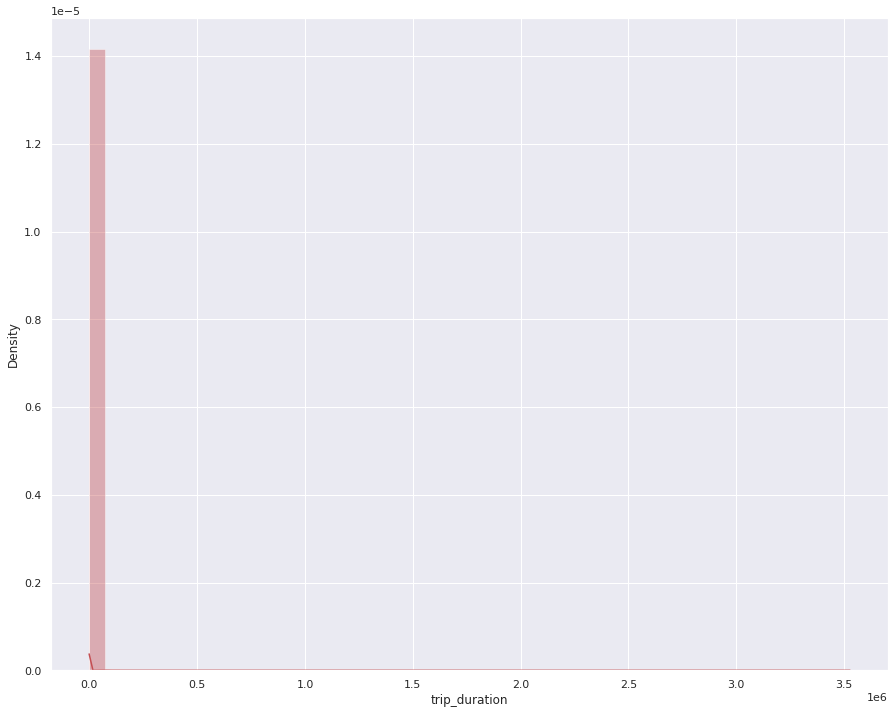

In [17]:
# pot for observing the outlier
plt.figure(figsize=(15,12))
sns.distplot(taxi_df['trip_duration'],color='R')

Normalize the trip duration data using log transformation for better visualization of  nature of data.

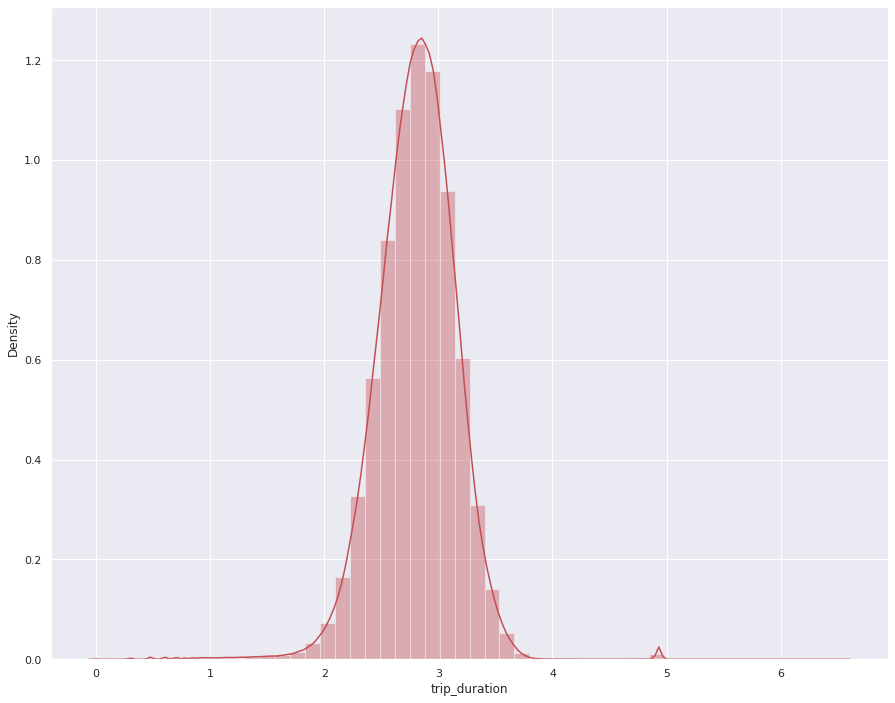

In [18]:
plt.figure(figsize=(15,12))
sns.distplot(np.log10(taxi_df['trip_duration']),color='R')

# Numerical feature selection and handling



In [19]:
# storing all feature in numerical_feature
numeric_feature=taxi_df.describe().columns
numeric_feature

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration'],
      dtype='object')

***Univarient Analysis***

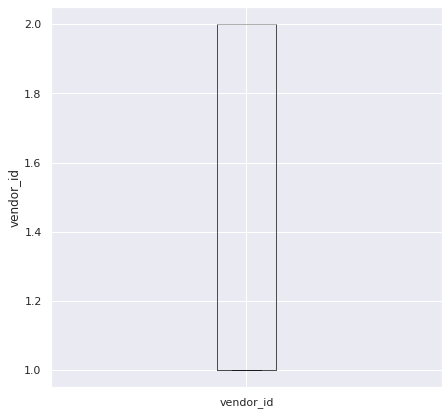

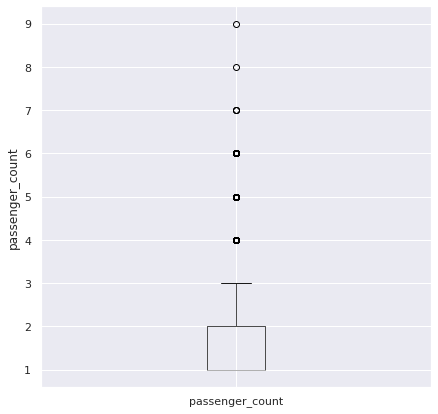

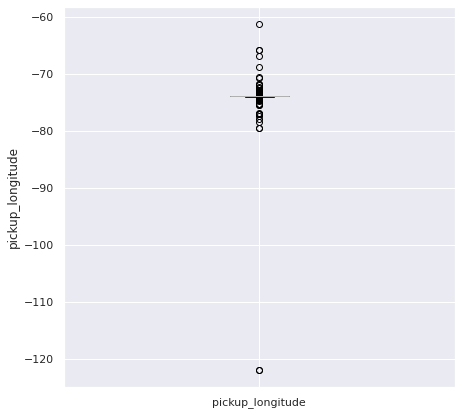

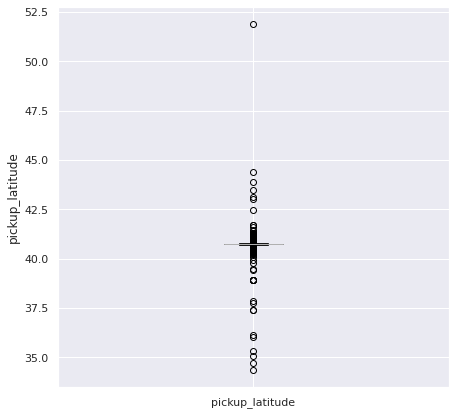

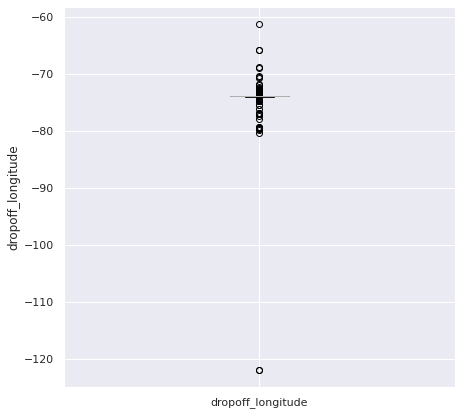

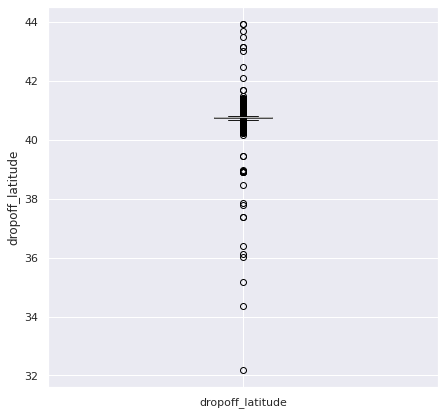

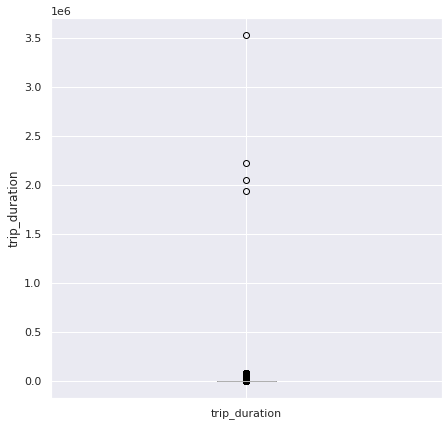

In [20]:
# for all feature distribution visualization on box plot
for col in numeric_feature:
  fig=plt.figure(figsize=(7,7))
  ax=fig.gca()
  taxi_df.boxplot(column= col, ax=ax)
  ax.set_ylabel(col)
plt.show()

**Ok what information from the box plot gives:-**

* vender id have no outlier so nothing for it.
* pessanger count more then 4 consider as outlier so we need to remove it from the analysis
* pickup time and dropoff time also have outlier
* pickup logitude and latitutde also have outlier 
* trip duration which is our target variable have larger value of outlier

so what we need  to do for the further analysis is to remove out the outlier for precise reading data .

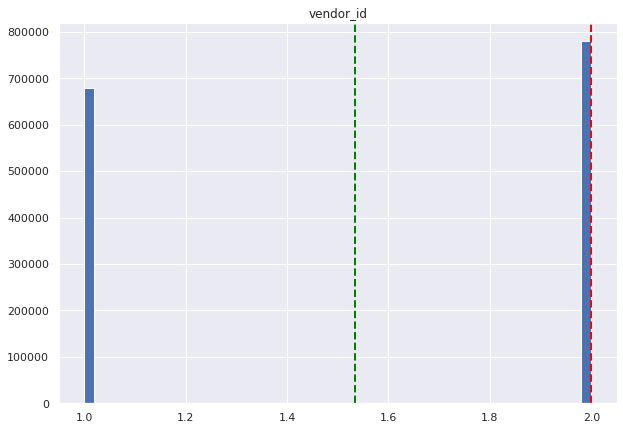

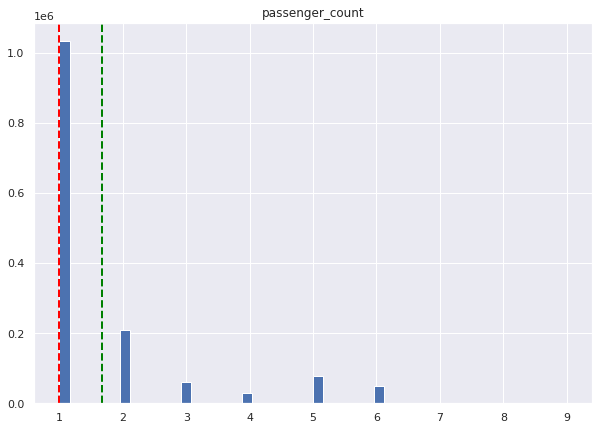

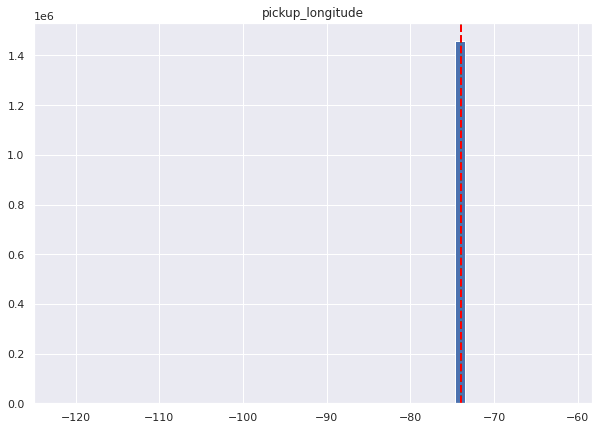

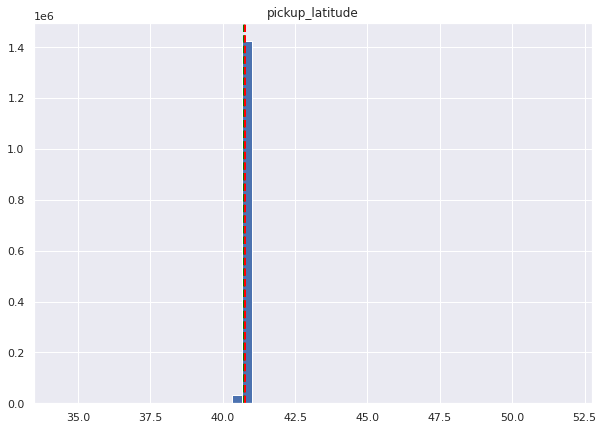

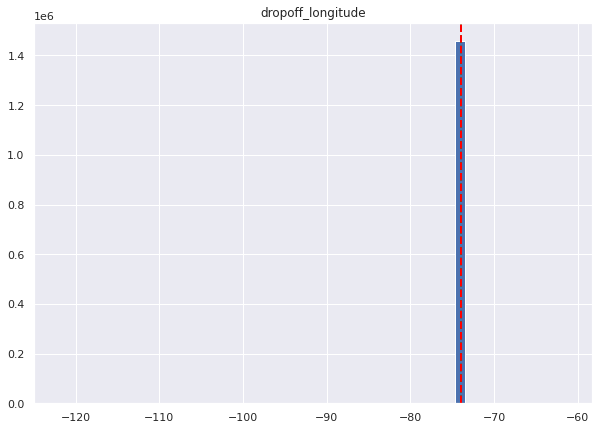

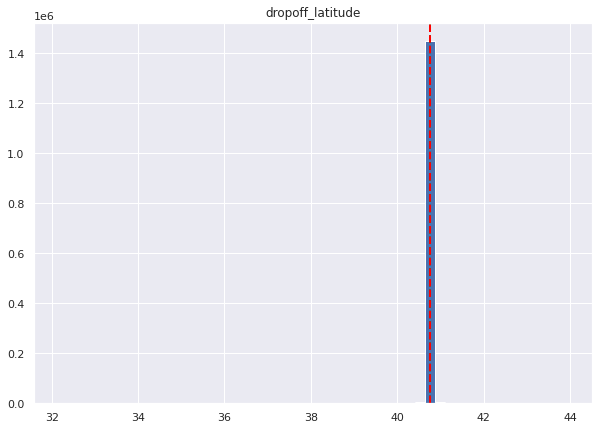

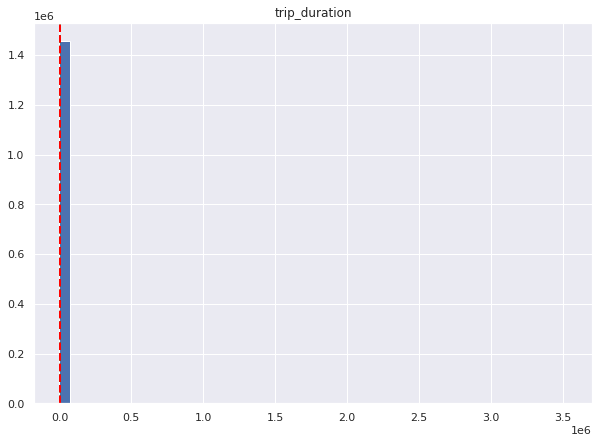

In [21]:
# we also plot a bar plot for more study on data
for col in numeric_feature:
  fig=plt.figure(figsize=(10,7))
  ax=fig.gca()
  feature=taxi_df[col]
  feature.hist(bins=50,ax =ax)
  ax.axvline(feature.mean(),color='green',linestyle='dashed',linewidth=2)
  ax.axvline(feature.median(),color='red',linestyle='dashed',linewidth=2)
  ax.set_title(col)
plt.show()  


outputs from the bar plot of all the features 
* for pessanger count the mean value lie between 1 and 2 and median moves towards 1

not conclusive result from these plot so let's move for next plot

***Baivarient Analysis***

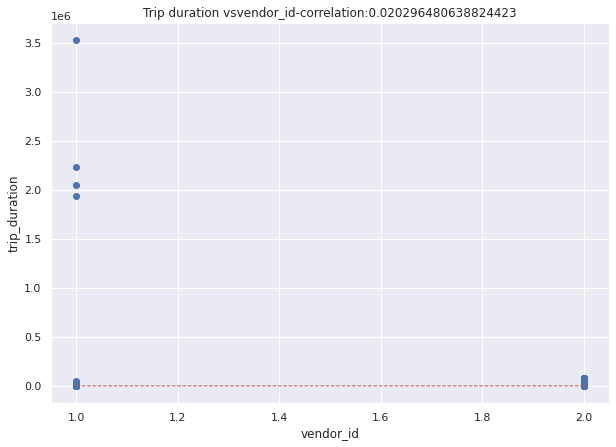

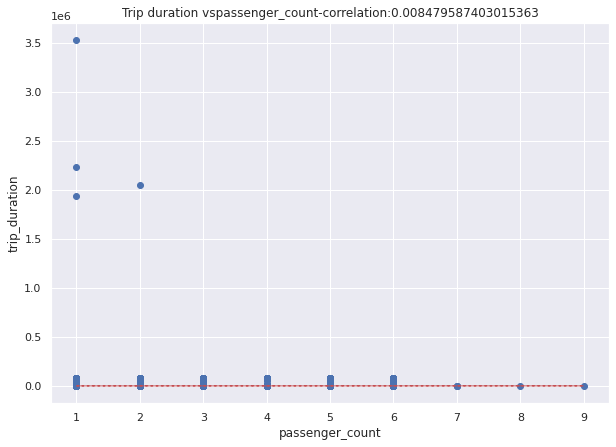

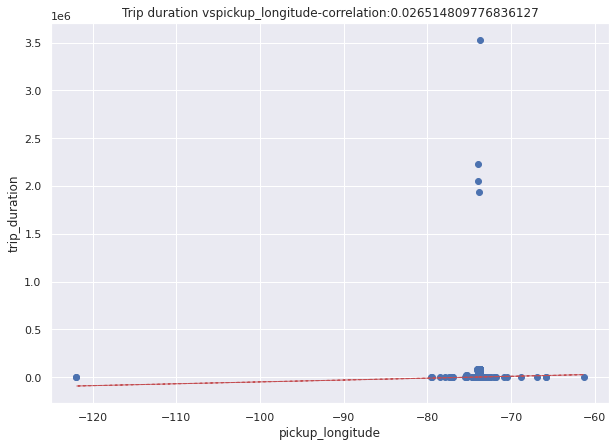

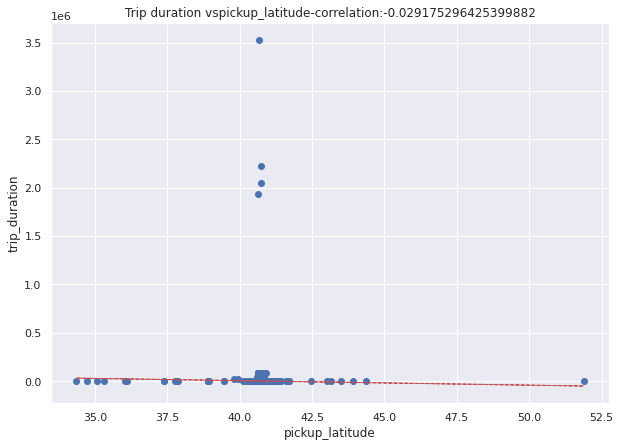

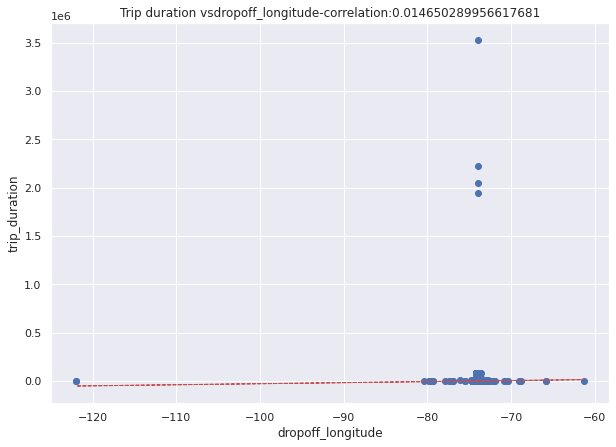

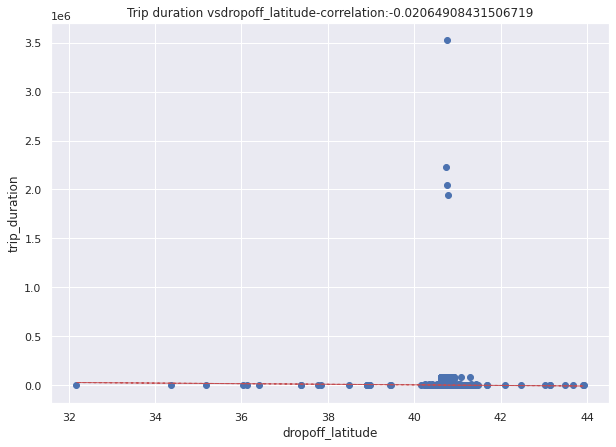

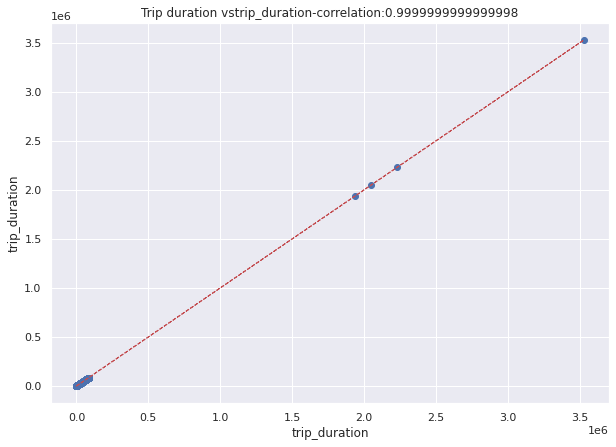

In [22]:
#scatter plot for the relation between features
for col in numeric_feature:
  fig=plt.figure(figsize=(10,7))
  ax=fig.gca()
  label=taxi_df['trip_duration']
  feature=taxi_df[col]
  correlation=feature.corr(label)
  plt.scatter(x=feature,y=label)
  plt.xlabel(col)
  plt.ylabel('trip_duration')
  ax.set_title('Trip duration vs' + col + '-correlation:'+ str(correlation))
  z=np.polyfit(taxi_df[col], taxi_df['trip_duration'], 1)
  y_het=np.poly1d(z)(taxi_df[col])
  plt.plot(taxi_df[col],y_het,"r--",lw=1)
plt.show()  


Observation on collinearity and multicolinearity

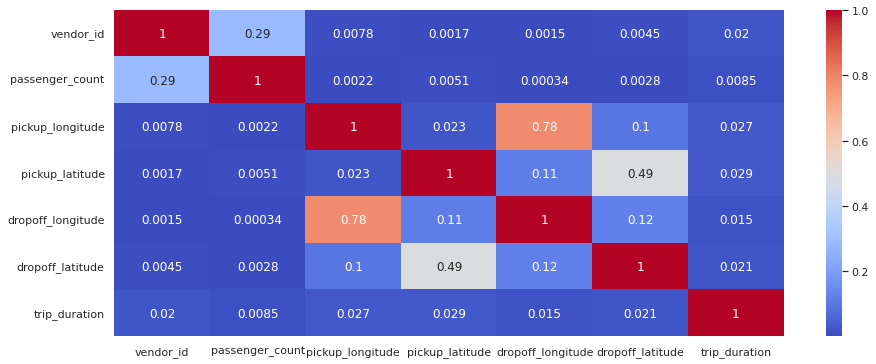

In [23]:
#correlation
plt.figure(figsize=(15,6))
correlation=taxi_df.corr()
sns.heatmap(abs(correlation),annot=True,cmap="coolwarm")

we can say that pickup logitude and latitutde and dropoff longitude and latitude have correlation to each other

Text(0.5, 1.0, 'dropoff_location')

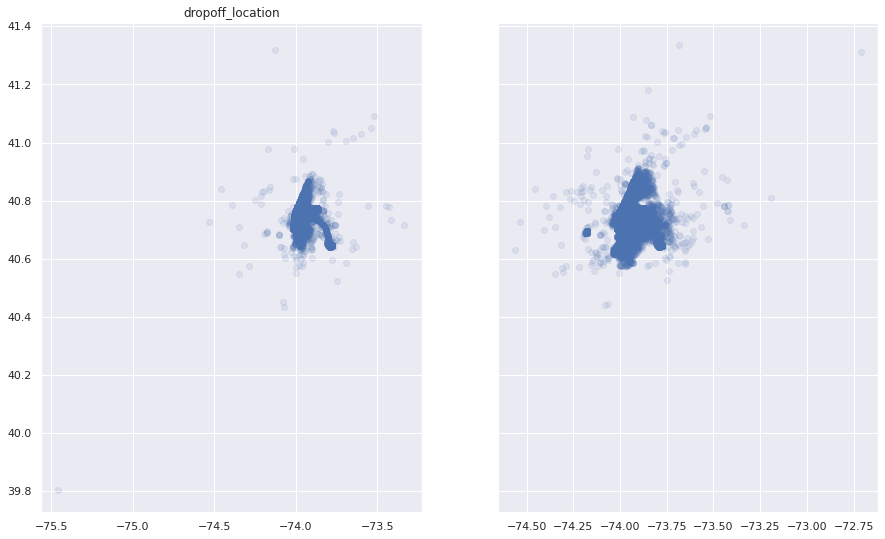

In [24]:
#scatter plot for get more information about the logitude nad latitude
n=120000
f, (ax1,ax2)=plt.subplots(1,2, sharey=True,figsize=(15,9))
ax1.scatter(taxi_df.pickup_longitude[:n],taxi_df.pickup_latitude[:n],alpha=0.1)
ax1.set_title('pickup_location')
ax2.scatter(taxi_df.dropoff_longitude[:n],taxi_df.dropoff_latitude[:n],alpha=0.1)
ax1.set_title('dropoff_location')

after Google search  i found that the NEWYORK city map we found that it is in latitude 40.7141 and longitude-74.0016 so our rest of observation is bound between these value of longitude and latitude.

So I will try to define a bounding box(long_max,long_min,latti_max,latti_min)using the minimum maximum coordinate** **bold text


*Map plot for logitude and latitude*

In [25]:
#for longitude
print (min(taxi_df.pickup_longitude[:n].min(), taxi_df.dropoff_longitude[:n].min()))

-75.45591735839844


In [26]:
print (max(taxi_df.pickup_longitude[:n].max(), taxi_df.dropoff_longitude[:n].max()))

-72.71139526367188


In [27]:
# for latitude
print (min(taxi_df.pickup_latitude[:n].min(), taxi_df.dropoff_latitude[:n].min()))

39.803932189941406


In [28]:
print (max(taxi_df.pickup_latitude[:n].max(), taxi_df.dropoff_latitude[:n].max()))

41.334739685058594


In [29]:
# bounded box range
BB=(-75.4559,-72.7113,39.8039,41.3347)


In [30]:
# creat a funciton for boundbox of the  given range
def within_boundingbox(taxi_df,BB):
   return ((taxi_df['pickup_longitude'] >= BB[0]) & (taxi_df['pickup_longitude'] <=BB[1]) & 
            (taxi_df['pickup_latitude']>= BB[2]) & (taxi_df['pickup_latitude'] <= BB[3]) &
            (taxi_df['dropoff_longitude'] >= BB[0]) & (taxi_df['dropoff_longitude'] <= BB[1]) &
             (taxi_df['dropoff_latitude'] >= BB[2]) & (taxi_df['dropoff_latitude'] <= BB[3]))


In [31]:
#return boolean
taxi_df=taxi_df[within_boundingbox(taxi_df,BB)]

In [32]:
# we saturate us for this bounded regio having given no of row observation
print("newsize  {} " .format(len(taxi_df)))

newsize  1458537 


In [33]:
#map for the plot
NYC_map = plt.imread('/content/drive/MyDrive/2-CAPSTON PROJECT SUPERWISED ML REGRESSION/New-York-City-Map-New-York-1265x964.jpg')
NYC_map.shape

(964, 1265, 3)

In [34]:
# function for the plot on map
def plot_on_map(taxi_df,BB,NYC_map,s=10,alpha=0.2):
  fig,axs = plt.subplots(1,2,figsize=(15,8))
  axs[0].scatter(taxi_df["pickup_longitude"],taxi_df["pickup_latitude"], alpha = alpha, c='g', s=s)
  axs[0].set_xlim((BB[0], BB[1]))
  axs[0].set_ylim((BB[2], BB[3]))
  axs[0].set_title('Pickup Locations')
  axs[0].imshow(NYC_map, extent=BB)
  axs[1].scatter(taxi_df['dropoff_longitude'],taxi_df['dropoff_latitude'], alpha = alpha, c='r', s=s)
  axs[1].set_xlim((BB[0], BB[1]))
  axs[1].set_ylim((BB[2], BB[3]))
  axs[1].set_title('Dropoff Locations')
  axs[1].imshow(NYC_map, extent=BB)



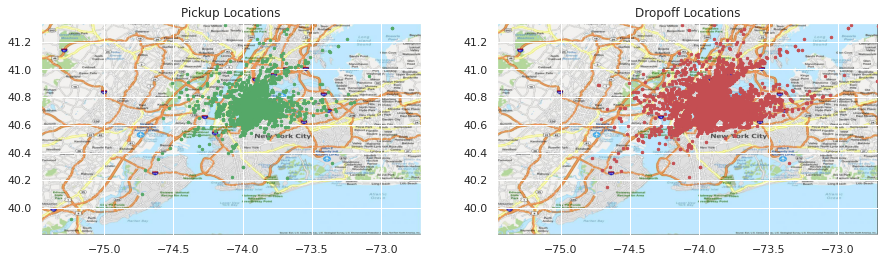

In [35]:
plot_on_map(taxi_df, BB , NYC_map , s=6 , alpha=1)

In [36]:
#googlemap location wise taxi demand 
import folium
f= folium.Figure(width=1200,height=300)
mapa =folium.Map(location= (39.7679, -75.4592), zoom_start=11).add_to(f)

for index, row in taxi_df.sample(1000).iterrows():
    folium.Marker([row['pickup_latitude'],row['pickup_longitude']],icon=folium.Icon(color='green')).add_to(mapa)
    folium.Marker([row['dropoff_latitude'],row['dropoff_longitude']],icon=folium.Icon(color='purple')).add_to(mapa)
display(mapa)

#**Feature Engineering**

In [37]:
# extracting the day from the datetime
taxi_df['pickup_day']=taxi_df['pickup_datetime'].dt.day_name()
taxi_df['dropoff_day']=taxi_df['dropoff_datetime'].dt.day_name()
taxi_df.head()


id  vendor_id  ... pickup_day dropoff_day
0  id2875421          2  ...     Monday      Monday
1  id2377394          1  ...     Sunday      Sunday
2  id3858529          2  ...    Tuesday     Tuesday
3  id3504673          2  ...  Wednesday   Wednesday
4  id2181028          2  ...   Saturday    Saturday

[5 rows x 13 columns]

now make plot for the  new feature data and find the most busy day for the taxi drivers


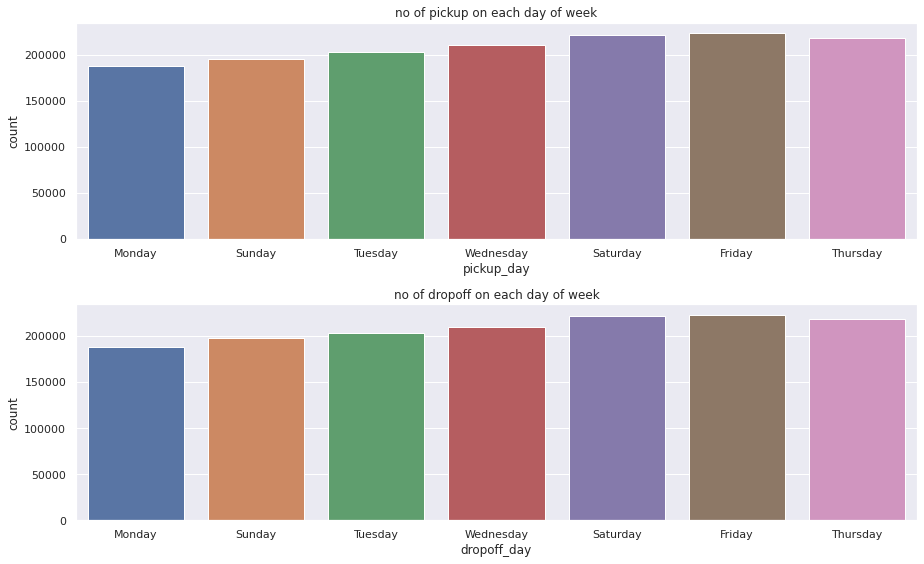

In [38]:
# day wise plot for both pickup and drop off
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(13,8))
sns.countplot(x='pickup_day',data=taxi_df,ax=ax[0])
ax[0].set_title('no of pickup on each day of week')
sns.countplot(x='dropoff_day',data=taxi_df,ax=ax[1])
ax[1].set_title('no of dropoff on each day of week')
plt.tight_layout()

what I see is **Saturday** and **Friday** is the most  busy day for taxi driver and **Monday** is the least busy. .

Now also take a look for the time of busyness 

Here I use three time zone:-

**Morning**(4hr TO 10hr)

**Afternoon**(10 hr TO 16hr)

**Evening**(16hr TO 22hr)

**Latenight**(22hr TO 4hr)

In [39]:
#Stting the range of the hr for the trip
bins=np.array([0,1800,3600,5400,7200,90000])
taxi_df['time_duration']=pd.cut(taxi_df.trip_duration,bins,labels=["<5","5-10","10-15","15-22",">22"])
taxi_df['time_duration']


0            <5
1            <5
2          5-10
3            <5
4            <5
           ... 
1458639      <5
1458640      <5
1458641      <5
1458642      <5
1458643      <5
Name: time_duration, Length: 1458537, dtype: category
Categories (5, object): ['<5' < '5-10' < '10-15' < '15-22' < '>22']

Now distribute this time zone bins as per deccided day 

In [40]:
# function for the day selection based on the time zone 
import datetime
def daytimezone(x):
  if (x>=datetime.time(4,0,1) and x<=datetime.time(10,0,0)):
    return "Morning"
  elif (x>=datetime.time(10,0,1) and x<=datetime.time(16,0,0)):
    return "Afternoon"
  elif (x>=datetime.time(16,0,1) and x<=datetime.time(22,0,0)):
    return "Evening"
  else :
     return "Latenight"       

In [41]:
#function call finding the day from the time zone
taxi_df['pickup_timezone']=taxi_df['pickup_datetime'].apply(lambda x :daytimezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
taxi_df['dropoff_timezone']=taxi_df['dropoff_datetime'].apply(lambda x :daytimezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )


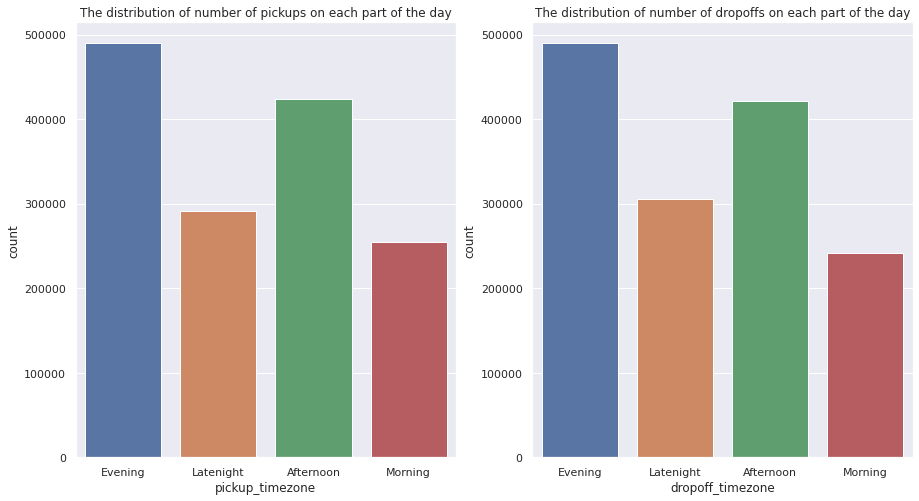

In [42]:
# plot for the  busy time zone of the day for taxi driver
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,8))
sns.countplot(x='pickup_timezone',data=taxi_df,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')
sns.countplot(x='dropoff_timezone',data=taxi_df,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each part of the day')
plt.show()

Usefull results from the plot .
 Evening time is most bussy for the drivers. 

Text(0.5, 1.0, 'The Distribution of percentage of different duration of trips')

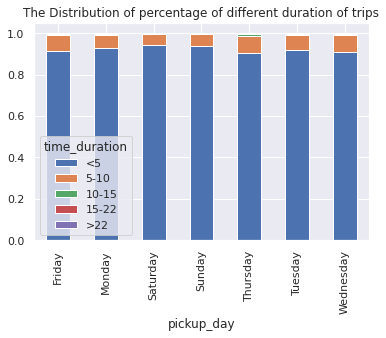

In [43]:
#groupby plot for the pickup day and time duration
ax1=taxi_df.groupby('pickup_day')["time_duration"].value_counts(normalize=True).unstack()
ax1.plot(kind='bar', stacked='True')
plt.title('The Distribution of percentage of different duration of trips')

Text(0.5, 1.0, 'The Distribution of percentage of different duration of trips')

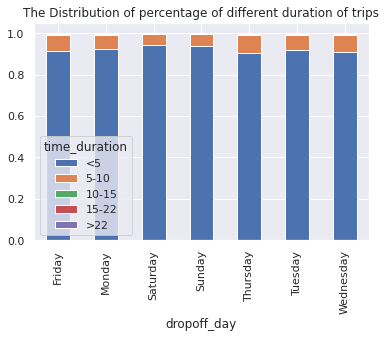

In [44]:
# plotfor the droopoff day and time duration 
ax2=taxi_df.groupby('dropoff_day')["time_duration"].value_counts(normalize=True).unstack()
ax2.plot(kind='bar', stacked='True')
plt.title('The Distribution of percentage of different duration of trips')

I extract lot of information from the time zone and day of the week for the taxi busyness. it's time to set and extract the relation between the longitude and latitude in term or distance because these have collinearity 

**Reduse the multicollinearity** and create a column of distance from the longitude and latitude which required some complicated operation respect to longitude and latitude.

In [45]:
#distance calculator function from the longitude and latitude
from math import  sin,cos,sqrt,atan2,radians
def distance_calculator(lon_1,lon_2,lati_1,lati_2):
  ''' this function is used to calculating the distance form the longitude and latitude'''
  R=6400
  log1r=radians(lon_1)
  lat1r=radians(lati_1)
  log2r=radians(lon_2)
  lat2r=radians(lati_2)
  diffrence_long=log2r-log1r
  diffrence_lati=lat2r-lat1r
  a = sin(diffrence_lati/ 2)**2 + cos(lat1r) * cos(lat2r) * sin(diffrence_long / 2)**2
  c = 2 * atan2(sqrt(a), sqrt(1 - a))
  distance=R*c
  return distance  

In [46]:
# creating new feature distance
taxi_df['distance']=taxi_df.apply(lambda x:distance_calculator(x['pickup_longitude'],x['dropoff_longitude'],x['pickup_latitude'],x['dropoff_latitude']),axis=1)


In [47]:
# print distance feature value
taxi_df['distance']

0          1.505342
1          1.813726
2          6.414163
3          1.492260
4          1.193999
             ...   
1458639    1.230657
1458640    6.077374
1458641    7.860222
1458642    1.097537
1458643    1.139204
Name: distance, Length: 1458537, dtype: float64

# **Dealing with outlier**

IQR=Q3-Q1

Lower_limit_outlier=Q1-1.5*IQR

Upper_limit_outlier=Q3+1.5*IQR


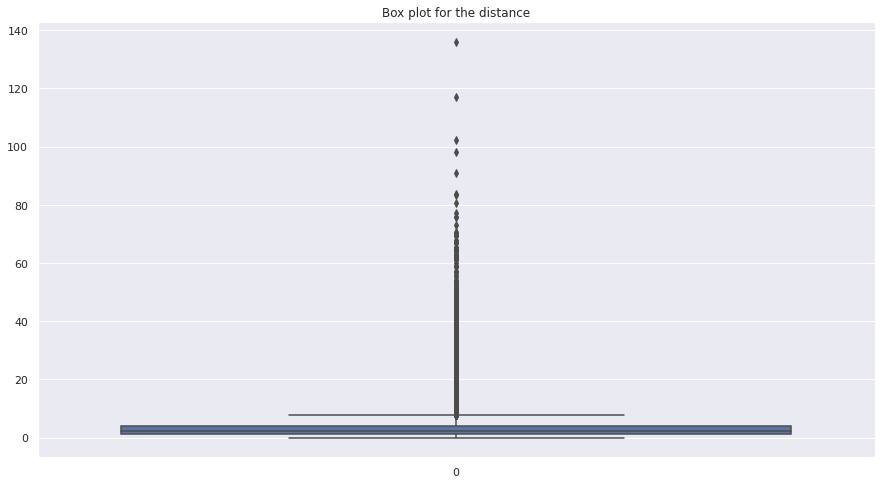

In [48]:
# box plot for the outlier observation
plt.figure(figsize=(15,8))
plt.title("Box plot for the distance")
ax=sns.boxplot(data=taxi_df['distance'],orient="v")

In [49]:
# arrange the value based the value in the descrbe range 
pctl_q1=np.percentile(taxi_df["distance"],25)
print(pctl_q1)
pctl_q2=np.percentile(taxi_df["distance"],50)
print(pctl_q2)
pctl_q3=np.percentile(taxi_df["distance"],75)
print(pctl_q3)

1.2375477828775951
2.1033103771581976
3.892941861566685


In [50]:
#formula for setting the upper and lower limits 
IQR=pctl_q3-pctl_q1
Lower_limit_outlier=pctl_q1-1.5*IQR
Upper_limit_outlier=pctl_q3+1.5*IQR

In [51]:
#print both of limits
print('lower limit of outlier:' , Lower_limit_outlier)
print('Upper limit of outlier:' , Upper_limit_outlier)

lower limit of outlier: -2.7455433351560403
Upper limit of outlier: 7.87603297960032


In [52]:
# storing the value in the features based on upper and lower limits 
taxi_df=taxi_df[taxi_df["distance"]>Lower_limit_outlier]
taxi_df=taxi_df[taxi_df["distance"]<Upper_limit_outlier]


In [53]:
# shape with limiting value of the distance
taxi_df.shape

(1317888, 17)

you can observe the row reduction due to treatment of distance outlier

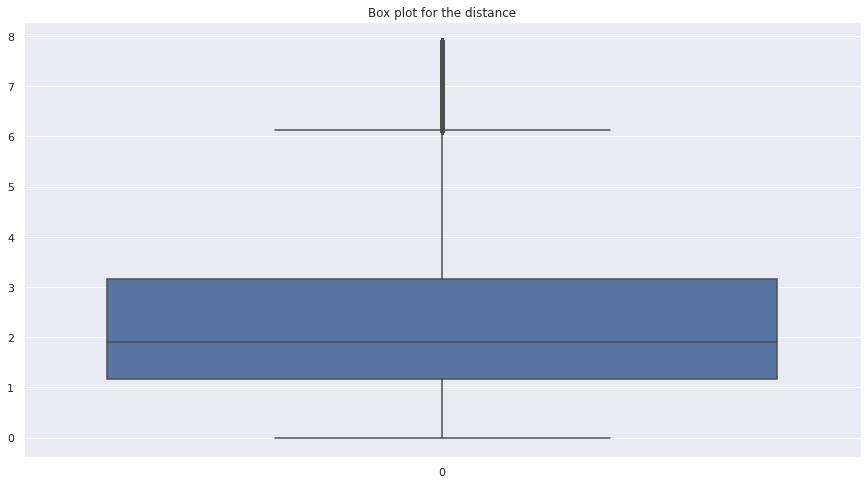

In [54]:
# plot after removing  outlier
plt.figure(figsize=(15,8))
plt.title("Box plot for the distance")
ax=sns.boxplot(data=taxi_df['distance'],orient="v")

Remove the outlier from the trip duration

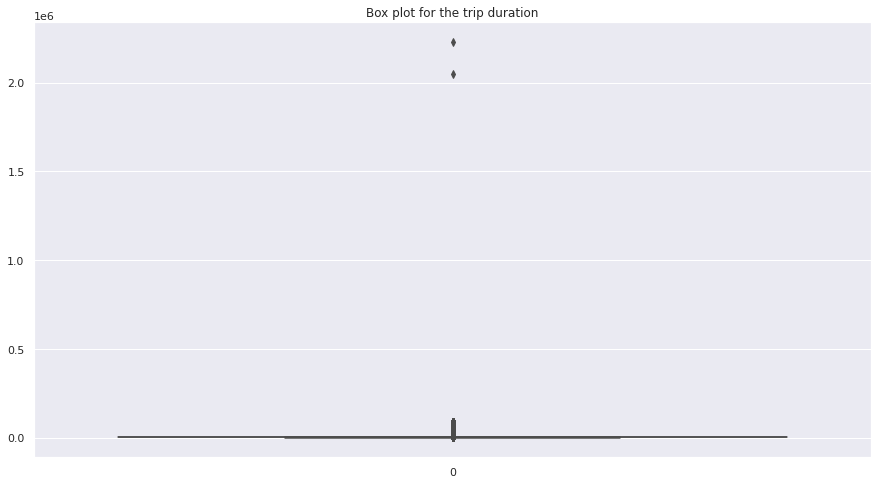

In [55]:
# boxplot for the trip duartion
plt.figure(figsize=(15,8))
plt.title("Box plot for the trip duration")
ax=sns.boxplot(data=taxi_df['trip_duration'],orient="v")

In [56]:
# setting the range of the trip duration in the describe range
pctl_trip_q1=np.percentile(taxi_df["trip_duration"],25)
print(pctl_trip_q1)
pctl_trip_q2=np.percentile(taxi_df["trip_duration"],50)
print(pctl_trip_q2)
pctl_trip_q3=np.percentile(taxi_df["trip_duration"],75)
print(pctl_trip_q3)

373.0
605.0
931.0


In [57]:
# formual setting for the upper andlower limits
IQR=pctl_trip_q3-pctl_trip_q1
Lower_limit_outlier_trip=pctl_trip_q1-1.5*IQR
Upper_limit_outlier_trip=pctl_trip_q3+1.5*IQR

In [58]:
# print the upper and lower limits
print('lower limit of outlier:' , Lower_limit_outlier_trip)
print('Upper limit of outlier:' , Upper_limit_outlier_trip)

lower limit of outlier: -464.0
Upper limit of outlier: 1768.0


In [59]:
#negative trip duration have no meaning so setup the upper and lower limits in the given range
taxi_df=taxi_df[taxi_df["trip_duration"]>0]
taxi_df=taxi_df[taxi_df["trip_duration"]<Upper_limit_outlier_trip]


In [60]:
# shape after the removal of outlier
taxi_df.shape

(1277317, 17)

Reduce no of row shows here removal of trip duration outlier from the data

Now remove the outlier from the passenger count

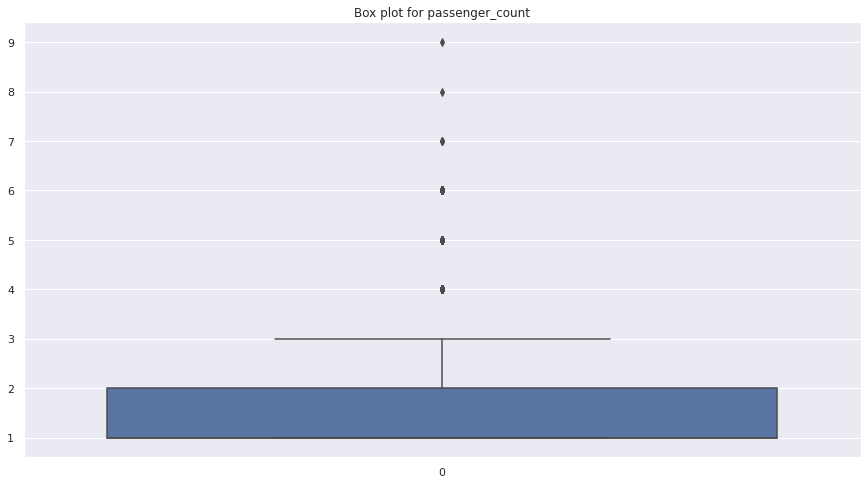

In [61]:
#box plot for the passenger count
plt.figure(figsize=(15,8))
plt.title("Box plot for passenger_count")
ax=sns.boxplot(data=taxi_df['passenger_count'],orient="v")

In [62]:
# setting the range of value 
pctl_passcount_q1=np.percentile(taxi_df["passenger_count"],25)
print(pctl_passcount_q1)
pctl_passcount_q2=np.percentile(taxi_df["passenger_count"],50)
print(pctl_passcount_q2)
pctl_passcount_q3=np.percentile(taxi_df["passenger_count"],75)
print(pctl_passcount_q3)

1.0
1.0
2.0


In [63]:
#formula setup for the calculation of limits
IQR=pctl_passcount_q3-pctl_passcount_q1
Lower_limit_outlier_passcount=pctl_passcount_q1-1.5*IQR
Upper_limit_outlier_passcount=pctl_passcount_q3+1.5*IQR

In [64]:
# print the value of upper and lower limits
print('lower limit of outlier:' , Lower_limit_outlier_passcount)
print('Upper limit of outlier:' , Upper_limit_outlier_passcount)

lower limit of outlier: -0.5
Upper limit of outlier: 3.5


In [65]:
# including the value based on the given limits
taxi_df=taxi_df[taxi_df["passenger_count"]>0]
taxi_df=taxi_df[taxi_df["passenger_count"]<Upper_limit_outlier]

In [66]:
# shape after outlier treatment
taxi_df.shape

(1277315, 17)

In [67]:
# table features after the outlier treatment
taxi_df.head()

id  vendor_id  ... dropoff_timezone  distance
0  id2875421          2  ...          Evening  1.505342
1  id2377394          1  ...        Latenight  1.813726
3  id3504673          2  ...          Evening  1.492260
4  id2181028          2  ...        Afternoon  1.193999
5  id0801584          2  ...        Latenight  1.103945

[5 rows x 17 columns]

Extract year ,month,day and time from the datetime formate.

In [68]:
# make more accurate extraction
taxi_df['pickup_datetime']=pd.to_datetime(taxi_df['pickup_datetime'],format="%Y-%m-%d %H:%M:%S")

In [69]:
# pickup date time table
taxi_df['pickup_datetime']

0         2016-03-14 17:24:55
1         2016-06-12 00:43:35
3         2016-04-06 19:32:31
4         2016-03-26 13:30:55
5         2016-01-30 22:01:40
                  ...        
1458639   2016-04-08 13:31:04
1458640   2016-01-10 07:35:15
1458641   2016-04-22 06:57:41
1458642   2016-01-05 15:56:26
1458643   2016-04-05 14:44:25
Name: pickup_datetime, Length: 1277315, dtype: datetime64[ns]

In [70]:
# day feature
taxi_df['day']=taxi_df["pickup_datetime"].dt.day_name()
taxi_df['day']

0             Monday
1             Sunday
3          Wednesday
4           Saturday
5           Saturday
             ...    
1458639       Friday
1458640       Sunday
1458641       Friday
1458642      Tuesday
1458643      Tuesday
Name: day, Length: 1277315, dtype: object

In [71]:
# creating new feature for datetime
taxi_df['year']=taxi_df['pickup_datetime'].apply(lambda x: x.year)
taxi_df['month']=taxi_df['pickup_datetime'].apply(lambda x: x.month)
taxi_df['day_no']=taxi_df['pickup_datetime'].apply(lambda x: x.day)
taxi_df['hour']=taxi_df['pickup_datetime'].apply(lambda x: x.hour)
taxi_df['minute']=taxi_df['pickup_datetime'].apply(lambda x: x.minute)

In [72]:
# print dataset with new features
taxi_df.head()

id  vendor_id     pickup_datetime  ... day_no  hour  minute
0  id2875421          2 2016-03-14 17:24:55  ...     14    17      24
1  id2377394          1 2016-06-12 00:43:35  ...     12     0      43
3  id3504673          2 2016-04-06 19:32:31  ...      6    19      32
4  id2181028          2 2016-03-26 13:30:55  ...     26    13      30
5  id0801584          2 2016-01-30 22:01:40  ...     30    22       1

[5 rows x 23 columns]

**Calculation and log transformation for the distance and travel time**

In [73]:
# log transformation of new features trip durationa and distance
taxi_df['trip_duration_hr']=taxi_df['trip_duration']/3600
taxi_df['log_of_distance']=np.log(taxi_df.distance)
taxi_df['log_of_trip_duration_hr']=np.log(taxi_df.trip_duration_hr)
taxi_df['trip_duration_hr']




0          0.126389
1          0.184167
3          0.119167
4          0.120833
5          0.123056
             ...   
1458639    0.216111
1458640    0.181944
1458641    0.212222
1458642    0.103611
1458643    0.055000
Name: trip_duration_hr, Length: 1277315, dtype: float64

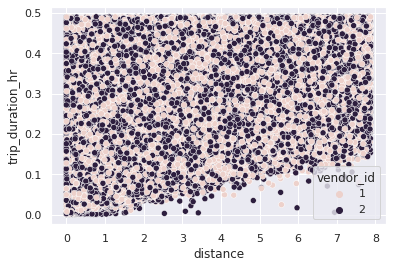

In [74]:
# scatter plot between trip duration and distance
sns.scatterplot(x="distance",y="trip_duration_hr",hue='vendor_id',data=taxi_df)


from the graph  we can say that vendor 1 provides mostly short trips and vendor 2 provides both short and long

now plot the relation between store_and_fwd_flag and trip duration

In [ ]:
# catplot for categorical feature
sns.catplot(x="store_and_fwd_flag",y="log_of_trip_duration_hr",kind="strip",data=taxi_df)

Distance vs time graph

In [ ]:
fig = plt.figure(figsize=(15,8))
sns.scatterplot(x='distance',y='trip_duration_hr',data=taxi_df)
# plt.figure(figsize=(10,8))
# sns.lineplot(x = taxi_df['distance'],y = taxi_df['trip_duration_hr'])
# sns.barplot(x = taxi_df['distance'],y = taxi_df['trip_duration_hr'], color="salmon")

distance and trip_duration_hr have conclusive information so let's see the distribution of it.

In [ ]:
# distribution plot for the distance and trip duration 
dependent_feature=['distance','trip_duration_hr']
for i in dependent_feature:
  plt.figure(figsize=(15,10))
  sns.distplot(taxi_df[i],color="g")

**ONE HOT ENCODING FOR CATOGORICAL VARIAVLE**

In [ ]:
#creating dummy column for the given feature
taxi_df= pd.get_dummies(taxi_df, columns=['store_and_fwd_flag', 'day'], prefix=['store_and_fwd_flag','day'])

In [ ]:
#read the dummy column in dataset
taxi_df.head()

In [ ]:
# separate  the dependent and independent feature
features=['vendor_id','passenger_count','distance','month','hour','minute','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude',
          'store_and_fwd_flag_N','store_and_fwd_flag_Y','day_Friday','day_Monday','day_Saturday','day_Sunday','day_Thursday','day_Tuesday','day_Wednesday']
datadd=['vendor_id','passenger_count','distance','month','hour','minute','store_and_fwd_flag_N','store_and_fwd_flag_Y','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude',
        'day_Friday','day_Monday','day_Saturday','day_Sunday','day_Thursday','day_Tuesday','day_Wednesday','trip_duration_hr']
trip_dat=[datadd]                       

In [ ]:
# separate  the dependent and independent feature 
from scipy.stats import zscore
X = taxi_df[features].apply(zscore)[:100000]
y=np.sqrt(taxi_df['trip_duration_hr'])[:100000]
# # Data for all the independent variables
# X = taxi_df.drop(labels='trip_duration_hr',axis=1)[:100000]

# # Data for the dependent variable

# y = np.sqrt(taxi_df['trip_duration_hr'])[:100000]
# y.head()

In [ ]:
X[:5]

In [ ]:
plt.figure(figsize=(15,10))
correlation=X.corr()
sns.heatmap(abs(correlation),annot=True,cmap="coolwarm")

Let's split data into train and test dataset

In [ ]:
#import train-test split library
from sklearn.model_selection import train_test_split

In [ ]:
#train-test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=34)

In [ ]:
# print the sahpe of train test
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

# **MODEL BUILDING**

## **In this project we are using four model on our data set for getting best performance:-**

LINEAR REGRESION 

LASSO REGRESSION

RIDGE REGRESSION

DECISION TREE

RANDOM FORREST 

GRADEINT BOOSTING

XGBOOST

For linear regression we have some assumptions, given below are the basic assumptions that a linear regression model makes regarding a dataset on which it is applied:(rewrite)

* **Linear relationship**: Relationship between response and feature variables should be linear. The linearity assumption can be tested using scatter plots.
* **Little or no multi-collinearity**: It is assumed that there is little or no multicollinearity in the data. Multicollinearity occurs when the features (or independent variables) are not independent from each other.
* **Little or no auto-correlation**: Another assumption is that there is little or no autocorrelation in the data. Autocorrelation occurs when the residual errors are not independent from each other.
* **Homoscedasticity**: Homoscedasticity describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables and the dependent variable) is the same across all values of the independent 

In [ ]:
reg=LinearRegression().fit(X_train,y_train)

In [ ]:
reg.score(X_train,y_train)

In [ ]:
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [ ]:
#for train data metrics
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

In [ ]:
#for test data metrics
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)



from sklearn.metrics import r2_score
r2= r2_score((y_test), (y_pred_test))
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(np.array(y_test))
plt.plot(np.array(y_pred_test))
plt.legend('Predicted vs Actual')
plt.show()

# **Heteroscadacity**

In [ ]:
# check the heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

# **Implementing Lasso Regression**

In [ ]:
from sklearn.model_selection import  GridSearchCV

In [ ]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lassso_regressor=GridSearchCV(lasso,parameters,scoring="r2",cv=5)
lassso_regressor.fit(X_train,y_train)

In [ ]:
lassso_regressor.score(X_train,y_train)

In [ ]:
y_test_lass=lassso_regressor.predict(X_test)
y_train_lass=lassso_regressor.predict(X_train)

In [ ]:
#residual plot
residual=y_test_lass-y_test
plt.figure(figsize=(15,12))
s1=range(0,len(y_test))
s2=[0 for i in range(0,len(y_test))]
plt.scatter(s1,residual,label="Residual")
plt.plot(s1,s2,color="R",label="regression line")
plt.xlabel("fitted point")
plt.ylabel("Residual")
plt.title("Residual vs fitted point ")
plt.legend()
plt.show()

In [ ]:
#plot for train
plt.figure(figsize=(15,10))

plt.title("Train data lasso")
plt.plot((y_train_lass))
plt.plot(np.array(y_train))
plt.legend('Predicted vs Actual')
plt.show()

In [ ]:
# plot for test
plt.figure(figsize=(15,10))

plt.title("Test data lasso")
plt.plot((y_test_lass))
plt.plot(np.array(y_test))
plt.legend('Predicted vs Actual')
plt.show()

In [ ]:
# metrics performance analysis
MSE  = mean_squared_error(y_test, y_test_lass)
print("Test MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("Test RMSE :" ,RMSE)

r2 = r2_score(y_test, y_test_lass)
print("Test R2 :" ,r2)
print("Test Adjusted R2 : ",1-(1-r2_score(y_test, y_test_lass))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

# **Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge
# cross validation
ridge=Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor= GridSearchCV(ridge,parameters,scoring="r2",cv=5)
ridge_regressor.fit(X_train,y_train)

In [ ]:
# ridge regressor score
ridge_regressor.score(X_train,y_train)

In [ ]:
print("the best fit alpha value is found to be:",ridge_regressor.best_params_)


In [ ]:
y_pred_test_ridge=ridge_regressor.predict(X_test)
y_pred_train_ridge=ridge_regressor.predict(X_train)

In [ ]:
print(y_pred_test_ridge)
print(y_pred_train_ridge)

In [ ]:
#residual plot
residual=y_pred_test_ridge-y_test
plt.figure(figsize=(15,12))
s1=range(0,len(y_test))
s2=[0 for i in range(0,len(y_test))]
plt.scatter(s1,residual,label="Residual")
plt.plot(s1,s2,color="R",label="regression line")
plt.xlabel("fitted point")
plt.ylabel("Residual")
plt.title("Residual vs fitted point ")
plt.legend()
plt.show()

In [ ]:
#plot for train
plt.figure(figsize=(15,10))

plt.title("Train data Ridge")
plt.plot((y_pred_train_ridge))
plt.plot(np.array(y_train))
plt.legend('Predicted vs Actual')
plt.show()

In [ ]:
# plot for test
plt.figure(figsize=(15,10))

plt.title("Test data ridge")
plt.plot((y_pred_test_ridge))
plt.plot(np.array(y_test))
plt.legend('Predicted vs Actual')
plt.show()

In [ ]:
# metrics performance analysis
MSE  = mean_squared_error(y_test, y_pred_test_ridge)
print("Test MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("Test RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_test_ridge)
print("Test R2 :" ,r2)
print("Test Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

# **Decision tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
# model input
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train,y_train)

In [ ]:
y_pred_train_dt = decision_regressor.predict(X_train)
y_pred_test_dt = decision_regressor.predict(X_test)

In [ ]:
#metric for decision tree for train
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

MSE= mean_squared_error(y_train, y_pred_train_dt)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)





from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_dt)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_dt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

In [ ]:
#metric for decision tree for test
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

MSE= mean_squared_error(y_test, y_pred_test_dt)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)





from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_dt)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_dt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

# Decision tree Visualization

In [ ]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [ ]:
# flow chart for decision tree
graph = Source(tree.export_graphviz(decision_regressor, out_file=None
   , feature_names=X.columns, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

# **Applying Random forrest regressor on data set**

In [ ]:
#creating an instance for the random forest
rf_model=RandomForestRegressor()
rf_model.fit(X_train,y_train)

In [ ]:
# Making predictions on train and test data in rf

y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

In [ ]:
#metric score for the rf for train dataset
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

MSE= mean_squared_error(y_train, y_pred_train_rf)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_rf)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

In [ ]:
#metric score for the rf for test dataset
print("Model Score:",rf_model.score(X_test,y_test))

MSE= mean_squared_error(y_test, y_pred_test_rf)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_rf)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

In [ ]:
#pred vs actual for random forrest
plt.figure(figsize=(8,5))
plt.plot((np.array(y_pred_test_rf)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
#Heteroscadacity
plt.scatter((y_pred_test_rf),(y_test)-(y_pred_test_rf))

In [ ]:
rf_model.feature_importances_

In [ ]:
importance_rf=rf_model.feature_importances_

In [ ]:
imortance_rf_dict={"Feature":list(X_train.columns),"Feature importance":importance_rf}
imortance_rf_df=pd.DataFrame(imortance_rf_dict)

In [ ]:
imortance_rf_df["Feature importance"]=round(imortance_rf_df["Feature importance"],2)

In [ ]:
imortance_rf_df.sort_values(by=["Feature importance"],ascending=False)

In [ ]:
rf_model.fit(X_train,y_train)

In [ ]:
features=X_train.columns
importance_rf=rf_model.feature_importances_
indices=np.argsort(importance_rf)

In [ ]:
plt.title("feature imporance")
plt.barh(range(len(indices)),importance_rf[indices],color="green",align="center")

plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel("Relative importance") 
plt.show() 

# Training Random forrest Regressor from GridesearchCV 

In [ ]:
# number of trees
n_estimators=[50,80,100]

#max deapth of tree
max_depth=[4,6,8]

#minimum no of sample required for spliting the node
min_samples_split=[50,100,150]

#minimum no of sample required at each leaf node
min_samples_leaf=[40,50]
#hyper parametr gride
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Importing Random forrest Regressor

In [133]:
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   8.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.0s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   8.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   7.9s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   7.9s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   8.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=  12.7s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=  13.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_s

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed: 78.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [134]:
rf_grid.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=40,
                      min_samples_split=50, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [135]:
rf_optimal_model = rf_grid.best_estimator_

In [136]:
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [137]:
# Making predictions on train and test data

y_pred_train_r_g = rf_optimal_model.predict(X_train)
y_pred_test_r_g = rf_optimal_model.predict(X_test)

In [138]:
#metrics for rf score with gd for train
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_optimal_model.score(X_train,y_train))

MSE= mean_squared_error(y_train, y_pred_train_r_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_r_g)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.649563542602449
MSE : 0.005400870491362031
RMSE : 0.07349061498832372
R2 : 0.649563542602449
Adjusted R2 : 0.6492302947200389


In [139]:
#metrics for rf score with gd for test
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_optimal_model.score(X_train,y_train))

MSE= mean_squared_error(y_test, y_pred_test_r_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_r_g)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_r_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.649563542602449
MSE : 0.005589654155876438
RMSE : 0.07476398970009852
R2 : 0.6366394148374863
Adjusted R2 : 0.636293876743488


In [140]:
rf_optimal_model.feature_importances_

array([2.13333885e-03, 1.71693938e-04, 8.43434783e-01, 2.37637557e-04,
       7.74712839e-02, 1.00299952e-03, 3.42231308e-03, 2.36914102e-03,
       3.37980067e-03, 4.69174701e-02, 0.00000000e+00, 0.00000000e+00,
       6.53516794e-04, 3.77357197e-04, 6.28404633e-03, 1.19955362e-02,
       7.48794945e-05, 4.98362690e-05, 2.43661610e-05])

In [141]:
importance_rf_gd=rf_optimal_model.feature_importances_
imortance_rf_gddict={"Feature":list(X_train.columns),"Feature importance":importance_rf_gd}
imortance_rf_gddf=pd.DataFrame(imortance_rf_gddict)

In [142]:
imortance_rf_gddf['Feature importance'] = round(imortance_rf_gddf['Feature importance'],2)

In [143]:
imortance_rf_gddf.head()

Feature  Feature importance
0        vendor_id                0.00
1  passenger_count                0.00
2         distance                0.84
3            month                0.00
4             hour                0.08

In [144]:
rf_optimal_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=40,
                      min_samples_split=50, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
features=X_train.columns
importance_rfgd=rf_optimal_model.feature_importances_
indices=np.argsort(importance_rfgd)

In [ ]:
plt.title("feature imporance")
plt.barh(range(len(indices)),importance_rfgd[indices],color="green",align="center")

plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel("Relative importance") 
plt.show()

# **# Applying Gradient Boosting Regression**

In [ ]:
gbd_model=GradientBoostingRegressor()
gbd_model.fit(X_train,y_train)

In [ ]:
# Making predictions on train and test data

y_pred_train_gb = gbd_model.predict(X_train)
y_pred_test_gb = gbd_model.predict(X_test)

In [ ]:
# for train data set
print("Model Score:",gbd_model.score(X_train,y_train))
MSE= mean_squared_error(y_train, y_pred_train_gb)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score(y_train, y_pred_train_gb)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_gb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

In [ ]:
# for test data set
print("Model Score:",gbd_model.score(X_train,y_train))
MSE= mean_squared_error(y_test, y_pred_test_gb)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score((y_test), (y_pred_test_gb))
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_gb)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

In [ ]:
#Heteroscadacity
plt.scatter((y_pred_test_gb),(y_test)-(y_pred_test_gb))

Feature importance

In [ ]:
gbd_model.feature_importances_

In [ ]:
importances_gb = gbd_model.feature_importances_

importance_dictgb = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances_gb}

importance_dfgb = pd.DataFrame(importance_dictgb)

In [ ]:
importance_dfgb['Feature Importance'] = round(importance_dfgb['Feature Importance'],2)

In [ ]:
importance_dfgb.head()

In [156]:
importance_dfgb.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
2               distance                0.82
4                   hour                0.08
9       dropoff_latitude                0.04
6       pickup_longitude                0.01
15            day_Sunday                0.01
8      dropoff_longitude                0.01
14          day_Saturday                0.01
12            day_Friday                0.00
17           day_Tuesday                0.00
16          day_Thursday                0.00
13            day_Monday                0.00
0              vendor_id                0.00
11  store_and_fwd_flag_Y                0.00
10  store_and_fwd_flag_N                0.00
1        passenger_count                0.00
7        pickup_latitude                0.00
5                 minute                0.00
3                  month                0.00
18         day_Wednesday                0.00

In [ ]:
gbd_model.fit(X_train,y_train)

In [ ]:
features = X_train.columns
importances =gbd_model.feature_importances_
indices = np.argsort(importances)

In [ ]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# Training Gradient Regressor with GridsearchCV

In [160]:
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

gb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=  12.5s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.5s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=  12.3s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=  12.2s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=  12.3s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=  12.3s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=  19.8s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=  20.4s
[CV] max_depth=4, min_samples_leaf=40, min_samples_s

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed: 131.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...e,
                          

In [161]:
gb_grid.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=8,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=40, min_samples_split=50,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [162]:
gb_optimal_model = gb_grid.best_estimator_

In [180]:
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [181]:
# Making predictions on train and test data

y_pred_train_gd_g = gb_optimal_model.predict(X_train)
y_pred_test_gd_g= gb_optimal_model.predict(X_test)

In [182]:
#gd with grid cv train performance
print("Model Score:",gb_optimal_model.score(X_train,y_train))
MSE= mean_squared_error(y_train, y_pred_train_gd_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score(y_train, y_pred_train_gd_g)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_gd_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.7678527865217604
MSE : 0.0035778156309352895
RMSE : 0.05981484457001698
R2 : 0.7678527865217604
Adjusted R2 : 0.7676320259083427


In [183]:
#metrics for rf score with gd for train
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_optimal_model.score(X_train,y_train))

MSE= mean_squared_error(y_test, y_pred_test_gd_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_gd_g)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_gd_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.7678527865217604
MSE : 0.004376466549929719
RMSE : 0.06615486792315226
R2 : 0.7155037857118932
Adjusted R2 : 0.715233243766374


# **Applying XGBoost on data set**

In [163]:
# Number of trees
n_estimators = [50,100,120]

# Maximum depth of trees
max_depth = [5,7,9]
min_samples_split = [40,50]
#learning_rate=[0.1,0.3,0.5]

# HYperparameter Grid
param_xgb = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
             'min_samples_split':min_samples_split
              }

In [164]:
# Create an instance of the  XGBRegressor
import xgboost as xgb
xgb_model = xgb.XGBRegressor()

# Grid search
xgb_grid = GridSearchCV(estimator=xgb_model,param_grid = param_xgb,cv = 3, verbose=2,scoring="r2")

xgb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] max_depth=5, min_samples_split=40, n_estimators=50 ..............
[17:54:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, min_samples_split=40, n_estimators=50, total=   4.2s
[CV] max_depth=5, min_samples_split=40, n_estimators=50 ..............
[17:54:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s


[CV]  max_depth=5, min_samples_split=40, n_estimators=50, total=   3.9s
[CV] max_depth=5, min_samples_split=40, n_estimators=50 ..............
[17:54:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_depth=5, min_samples_split=40, n_estimators=50, total=   3.9s
[CV] max_depth=5, min_samples_split=40, n_estimators=100 .............
[17:54:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_depth=5, min_samples_split=40, n_estimators=100, total=   7.7s
[CV] max_depth=5, min_samples_split=40, n_estimators=100 .............
[17:54:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_depth=5, min_samples_split=40, n_estimators=100, total=   7.7s
[CV] max_depth=5, min_samples_split=40, n_estimators=100 .............
[17:54:44] WARNING: /workspace/src/objective/

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  9.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [5, 7, 9], 'min_samples_split': [40, 50],
                         'n_estimators': [50, 100, 1

In [165]:
xgb_grid.best_score_

0.7186589284860089

In [166]:
xgb_grid.best_params_

{'max_depth': 9, 'min_samples_split': 40, 'n_estimators': 120}

In [167]:
xgb_optimal_model =xgb_grid.best_estimator_

In [168]:
y_pred_xgb_test=xgb_optimal_model.predict(X_test)
y_pred_xgb_train=xgb_optimal_model.predict(X_train)

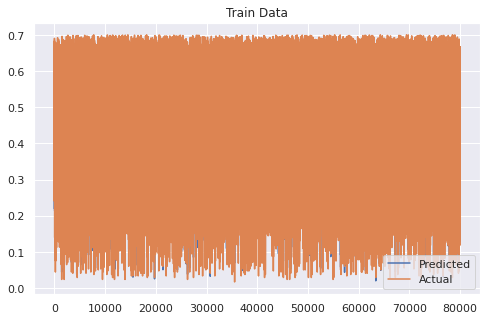

In [169]:
plt.figure(figsize=(8,5))
plt.title('Train Data')
plt.plot(y_pred_xgb_train)
plt.plot(np.array(y_train))
plt.legend(["Predicted","Actual"])
plt.show()

In [170]:
MSE  = mean_squared_error(y_train, y_pred_xgb_train)
print("Train MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("Train RMSE :" ,RMSE)

r2 = r2_score(y_train, y_pred_xgb_train)
print("Train R2 :" ,r2)
print("Train Adjusted R2 : ",1-(1-r2_score((y_train), (y_pred_xgb_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

Train MSE : 0.002626144404089607
Train RMSE : 0.05124592085317237
Train R2 : 0.8296021459771243
Train Adjusted R2 :  0.8295616663668913


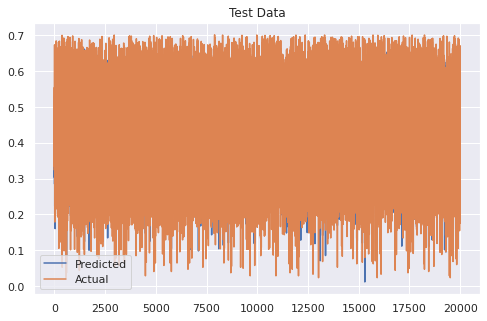

In [171]:
plt.figure(figsize=(8,5))
plt.title('Test Data')
plt.plot(y_pred_xgb_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [172]:
MSE  = mean_squared_error(y_test, y_pred_xgb_test)
print("Test MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("Test RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_xgb_test)
print("Test R2 :" ,r2)
print("Test Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_xgb_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Test MSE : 0.004273269773835568
Test RMSE : 0.06537025144387597
Test R2 : 0.7222121866080442
Test Adjusted R2 :  0.7219480240227365


In [173]:
X.columns

Index(['vendor_id', 'passenger_count', 'distance', 'month', 'hour', 'minute',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag_N', 'store_and_fwd_flag_Y',
       'day_Friday', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday'],
      dtype='object')

In [174]:
xgb_optimal_model.feature_importances_

array([0.01345042, 0.00808936, 0.41598815, 0.01545672, 0.07706134,
       0.01166408, 0.02482726, 0.0236923 , 0.02665444, 0.04759268,
       0.00877047, 0.        , 0.0231486 , 0.04968724, 0.0834721 ,
       0.10827818, 0.02289703, 0.02039579, 0.01887385], dtype=float32)

In [175]:
importances = xgb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [176]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [177]:
importance_df

Feature  Feature Importance
0              vendor_id                0.01
1        passenger_count                0.01
2               distance                0.42
3                  month                0.02
4                   hour                0.08
5                 minute                0.01
6       pickup_longitude                0.02
7        pickup_latitude                0.02
8      dropoff_longitude                0.03
9       dropoff_latitude                0.05
10  store_and_fwd_flag_N                0.01
11  store_and_fwd_flag_Y                0.00
12            day_Friday                0.02
13            day_Monday                0.05
14          day_Saturday                0.08
15            day_Sunday                0.11
16          day_Thursday                0.02
17           day_Tuesday                0.02
18         day_Wednesday                0.02

In [178]:
importance_df.sort_values(by=['Feature Importance'],ascending=False,inplace=True)

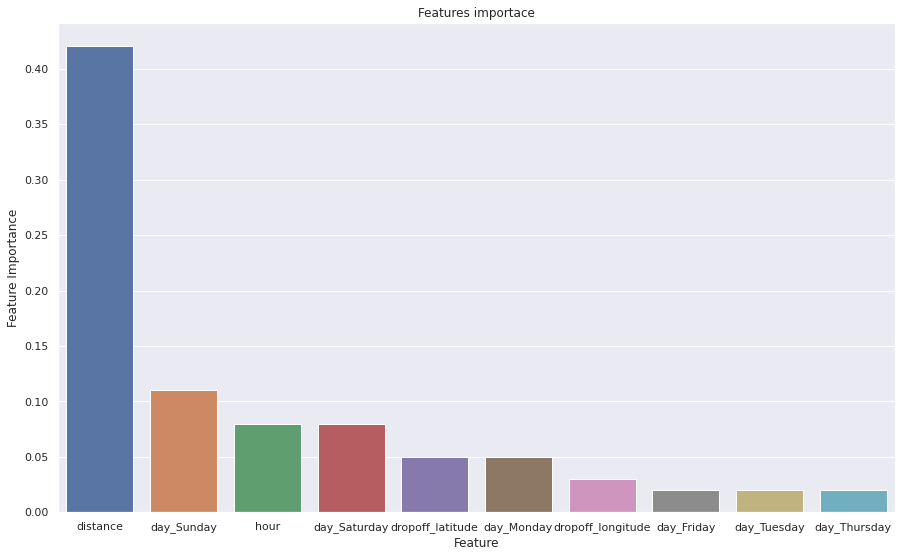

In [179]:
plt.figure(figsize=(15,9))
plt.title('Features importace')
sns.barplot(x='Feature',y="Feature Importance",data=importance_df[:10])

# Model Summery for the train data set 

In [187]:
from prettytable import PrettyTable
train = PrettyTable(['SL NO',"MODEL_NAME", "Train MSE", "Train RMSE",'Train R^2','Train Adjusted R^2'])
train.add_row(['1','Linear Regression','0.005467021181864388','0.07393930742077848','0.5042456435975543','0.5041278724951332'])
train.add_row(['2','Lasso Regression','0.005494826110976565','0.07412709431089665','0.49994898506301866','0.4998301932490177'])
train.add_row(['3','Ridge Regression ','0.005494824127596807','0.07412708093265785','0.4999491655584595','0.49983037378733686'])
train.add_row(['4','DecisionTree Regressor','0.003908733073695245','0.06251986143374956','0.6442897552818683','0.6442052529731706'])
train.add_row(['5','XGBRegressor','0.001996779863964856','0.044685342831457114','0.8182850963041854','0.8182419282225373'])
train.add_row(['6','GradientBoosting','0.002278863599313375','0.04773744441539969','0.7926143552635426','0.7925650888563159'])
print(train)

+-------+------------------------+----------------------+----------------------+---------------------+---------------------+
| SL NO |       MODEL_NAME       |      Train MSE       |      Train RMSE      |      Train R^2      |  Train Adjusted R^2 |
+-------+------------------------+----------------------+----------------------+---------------------+---------------------+
|   1   |   Linear Regression    | 0.005467021181864388 | 0.07393930742077848  |  0.5042456435975543 |  0.5041278724951332 |
|   2   |    Lasso Regression    | 0.005494826110976565 | 0.07412709431089665  | 0.49994898506301866 |  0.4998301932490177 |
|   3   |   Ridge Regression     | 0.005494824127596807 | 0.07412708093265785  |  0.4999491655584595 | 0.49983037378733686 |
|   4   | DecisionTree Regressor | 0.003908733073695245 | 0.06251986143374956  |  0.6442897552818683 |  0.6442052529731706 |
|   5   |      XGBRegressor      | 0.001996779863964856 | 0.044685342831457114 |  0.8182850963041854 |  0.8182419282225373 |


# Model Summery for the test data set 

In [188]:
from prettytable import PrettyTable
test = PrettyTable(['SL NO',"MODEL_NAME", "Test MSE", "Test RMSE",'Test R^2','Test Adjusted R^2'])
test.add_row(['1','Linear Regression','0.005539358995881834',' 0.07442687012015105','0.48551298500777995','0.48502373309162117'])
test.add_row(['2','Lasso Regression','0.005448974432213879','0.07381716895285187','0.5030970331831028','0.502624502834278'])
test.add_row(['3','Ridge Regression ','0.005449008499105121','0.07381739970430495','0.5030939265545915','0.5026213932515153'])
test.add_row(['4','DecisionTree Regressor','0.004203945325941736','0.06483783868962426','0.6166337480963826',' 0.6162691855945723'])
test.add_row(['5','XGBRegressor','0.0031306995630522444','0.0559526546559879','0.7145051935101532','0.7142337019524301'])
test.add_row(['6','GradientBoosting','0.00311712671404449','0.05583123421566543','0.7157429289820318',' 0.7154726144500327'])
print(test)

+-------+------------------------+-----------------------+----------------------+---------------------+---------------------+
| SL NO |       MODEL_NAME       |        Test MSE       |      Test RMSE       |       Test R^2      |  Test Adjusted R^2  |
+-------+------------------------+-----------------------+----------------------+---------------------+---------------------+
|   1   |   Linear Regression    |  0.005539358995881834 |  0.07442687012015105 | 0.48551298500777995 | 0.48502373309162117 |
|   2   |    Lasso Regression    |  0.005448974432213879 | 0.07381716895285187  |  0.5030970331831028 |  0.502624502834278  |
|   3   |   Ridge Regression     |  0.005449008499105121 | 0.07381739970430495  |  0.5030939265545915 |  0.5026213932515153 |
|   4   | DecisionTree Regressor |  0.004203945325941736 | 0.06483783868962426  |  0.6166337480963826 |  0.6162691855945723 |
|   5   |      XGBRegressor      | 0.0031306995630522444 |  0.0559526546559879  |  0.7145051935101532 |  0.71423370195